<a href="https://colab.research.google.com/github/hoangndst/ml-notebooks/blob/master/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Multi-class classification với Logistic Regression và one-vs-rest.

  <img src="https://machinelearningcoban.com/assets/13_softmax/onevsrest.png" width='700px' alt='img1'/>
  \begin{equation}
    a_i = \text{sigmoid}(z_i) = \text{sigmoid}(\mathbf{w}_i^T\mathbf{x})
  \end{equation}

### 2. Mô hình Softmax Regression dưới dạng Neural network.
  \begin{equation}
    a_i = \frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)}, ~~ \forall i = 1, 2, \dots, C
  \end{equation}

  <img src='https://machinelearningcoban.com/assets/13_softmax/softmax_nn.png' width='700px' />

### Softmax function trong Python

In [18]:
import numpy as np
def softmax(Z):
    e_Z = np.exp(Z)
    return e_Z / e_Z.sum(axis=0)

### Hàm mất mát cho Softmax Regression

\begin{eqnarray}
J(\mathbf{W}; \mathbf{X}, \mathbf{Y}) = -\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(a_{ji}) \newline
= -\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log\left(\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i)}{\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)}\right)
\end{eqnarray}


### Tối ưu hàm mất mát
- Ta sử dụng SGD
 \begin{eqnarray}
&=& -\sum_{j = 1}^C y_{ji}\log\left(\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i)}{\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)}\right) \newline
&=& -\sum_{j=1}^C\left(y_{ji} \mathbf{w}_j^T\mathbf{x}_i - y_{ji}\log\left(\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)\right)\right) \newline
&=& -\sum_{j=1}^C y_{ji} \mathbf{w}_j^T\mathbf{x}_i + \log\left(\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)\right) ~~ (3)
\end{eqnarray}

- Trong biến đổi ở dòng cuối cùng, tôi đã sử dụng quan sát: $\sum_{j=1}^C y_{ji} = 1$ vì nó là tổng các xác suất.
- Tiếp theo ta sử dụng công thức:
  \begin{equation*}
    \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}} = \left[\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_1}, \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_2}, \dots, \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_C}    \right]~~(4)
  \end{equation*}
- Trong đó, gradient theo từng cột có thể tính được dựa theo $(3)$:
  \begin{eqnarray}
\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_j} &=& -y_{ji}\mathbf{x}_i + 
\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i)}{\sum_{k = 1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)}\mathbf{x}_i \newline
&=& -y_{ji}\mathbf{x}_i + a_{ji} \mathbf{x}_i = \mathbf{x}_i (a_{ji} - y_{ji}) \newline
&=& e_{ji}\mathbf{x}_{i} ~(\text{where}~ e_{ji} = a_{ji} - y_{ji}) ~~(5)
\end{eqnarray}
- Đến đây ta đã được biểu thức rất đẹp rồi. Kết hợp $(4)$ và $(5)$:
    \begin{equation}
        \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}} = \mathbf{x}_i [e_{1i}, e_{2i}, \dots, e_{Ci}] = \mathbf{x}_i\mathbf{e}_i^T
    \end{equation}
- Từ đây ta cũng có thể suy ra rằng:
    \begin{equation}
        \frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = \sum_{i=1}^N \mathbf{x}_i\mathbf{e}_i^T = \mathbf{X}\mathbf{E}^T
    \end{equation}
### Công thức cập nhật cho ma trận trọng số:
  \begin{equation}
    \mathbf{W} = \mathbf{W} +\eta \mathbf{x}_{i}(\mathbf{y}_i - \mathbf{a}_i)^T
  \end{equation}

### Logistic Regression là một trường hợp đặt biệt của Softmax Regression

### Ví dụ với Python

In [28]:
import numpy as np
N = 2 # number of trainning sample
d = 2 # data dimension
C = 3 # number of classes

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))
print('-- X: \n', X)
print('--y: \n', y)
mix_id = np.random.permutation(10)
print(mix_id)


-- X: 
 [[2.13991714 0.65730956]
 [0.09954891 1.43434855]]
--y: 
 [1 2]
[3 6 9 5 1 0 2 4 8 7]


### Code Softmax Regression

In [21]:
def loss(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.num(Y*np.log(A))
def grad(X, Y, W):
    A = softmax(W.T.dot(X))
    E = A - Y
    return X.dot(E.T)

In [23]:
from scipy import sparse 
def convert_label(y, C=C):
    """
    convert 1d label to matrix label
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [47]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [43]:
def softmax_regression(X, y, W_init, lr, tol = 1e-4, max_count = 100000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_label(y, C=C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + lr*xi.dot((yi - ai).T)
            count += 1
            if count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
        
    return W


In [41]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T # each column is a datapoint
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(X.shape)
print(X)
original_label
Y = convert_label(original_label, C=C)
print(X[:, 2].reshape(C, 1))
print(Y[:, 2].reshape(C, 1))

(3, 1500)
[[1.         1.         1.         ... 1.         1.         1.        ]
 [2.15075281 0.73125727 1.35067731 ... 3.38081435 4.23699277 2.59902553]
 [1.57891543 3.29112017 2.48961572 ... 7.37871693 6.8338088  5.29546384]]
[[1.        ]
 [1.35067731]
 [2.48961572]]
[[1]
 [0]
 [0]]


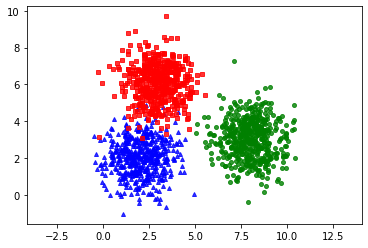

In [14]:
import matplotlib.pyplot as plt
def display(X, label):
    K = np.amax(label) + 1
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    # plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [45]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, lr=0.05)
print(W[-1])

[[12.5653861  -9.90570519 -4.449858  ]
 [-1.34491499  2.84894268 -0.4762535 ]
 [-1.93163    -1.01501018  1.69130137]]


In [48]:
#Visualize 
# x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
# x_min, x_max = -4, 14
# y_min, y_max = -4, 14

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)


print(XX.shape)

Z = pred(W[-1], XX)

(1, 270400)
(3, 270400)


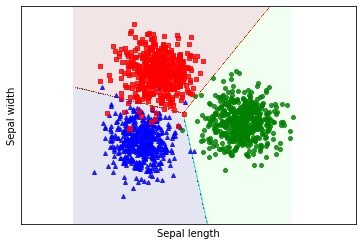

In [55]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1
# plt.pcolormesh(xx, yy, Z, cmap='jet', alpha = .35)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
plt.axis('equal')
display(X[1:, :], original_label)
# plt.savefig('ex1.png', bbox_inches='tight', dpi = 1000)
plt.show()